# ML code written on Oct,10 ,2022

wawfmp15222

resources: 
-> my code: https://github.com/muna-mohammed/New-York-City-property-sales-EDA

the dataset is from: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor 

In [3]:
data = pd.read_csv(r"/home/muna/Downloads/datasets/Medical Cost Personal Datasets.csv")

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
data.shape

(1338, 7)

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA 

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


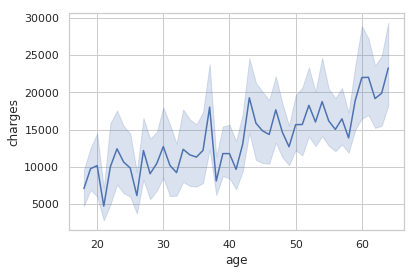

In [24]:
# draw line plot
sns.lineplot(x='age', y='charges', data=data)


/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Charges')

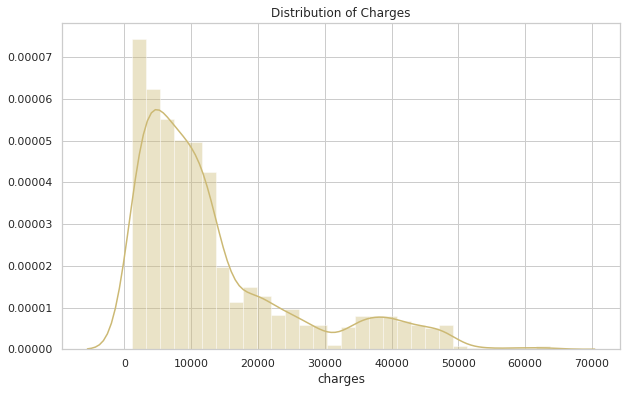

In [11]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(10,6))
ax = sns.distplot(data['charges'], kde=True, color='y')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


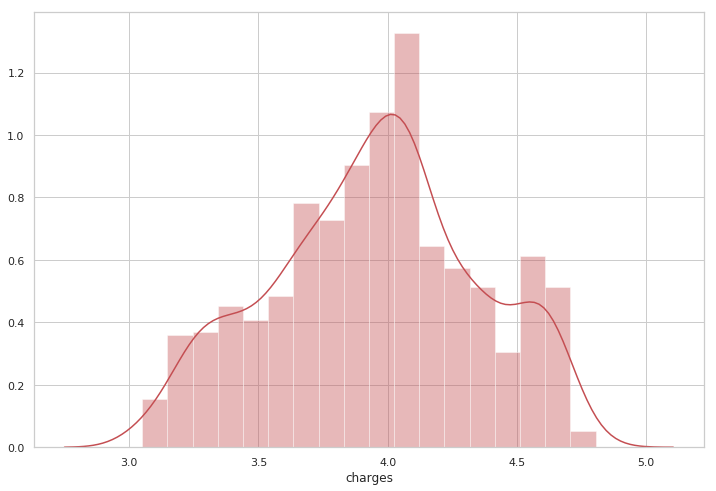

In [16]:
f, ax = plt.subplots(1, 1, figsize=(12,8))
ax = sns.distplot(np.log10(data['charges']), kde=True, color='r')

charges by region

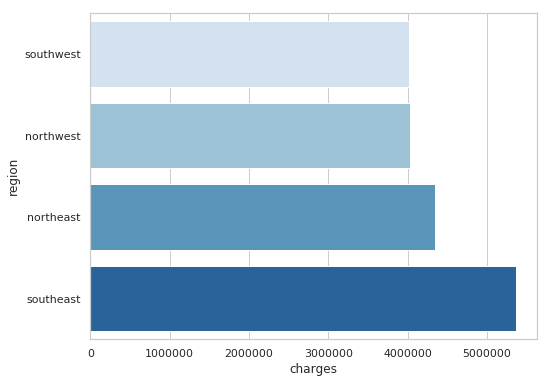

In [22]:

charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. 
Taking into account certain factors (sex, smoking, having children) 
let's see how it changes by region

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


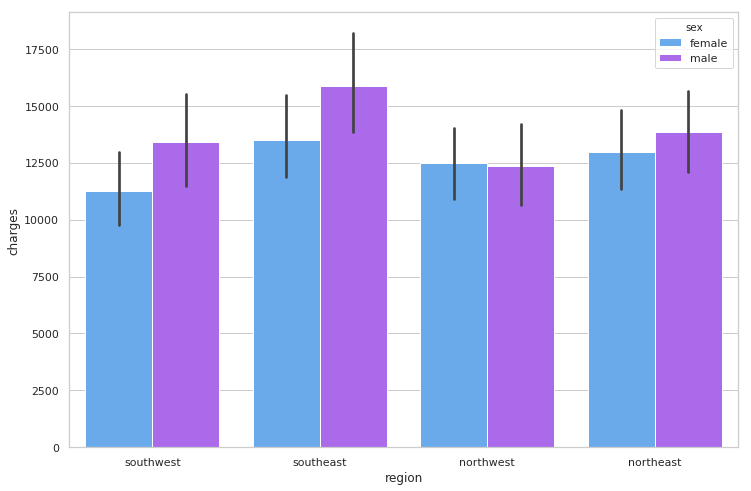

In [31]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='cool')


/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


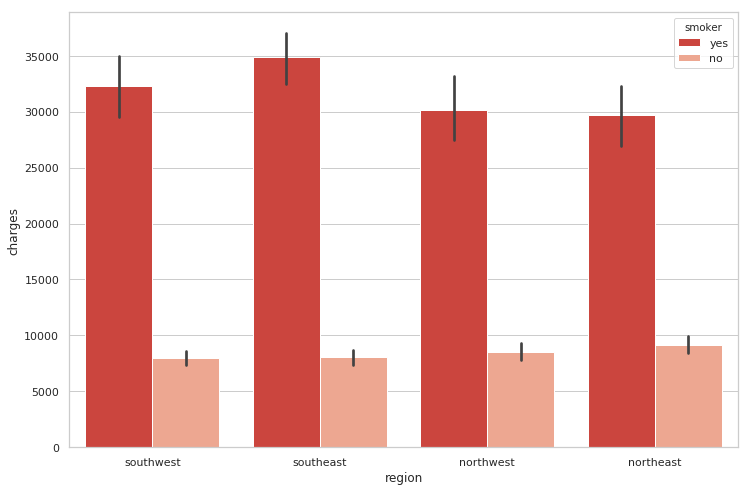

In [32]:
f, ax = plt.subplots(1, 1, figsize=(12,8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=data, palette='Reds_r')
                                                    #data= name of dataframe i.e df (in our case we call it data when we read the csv file)

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


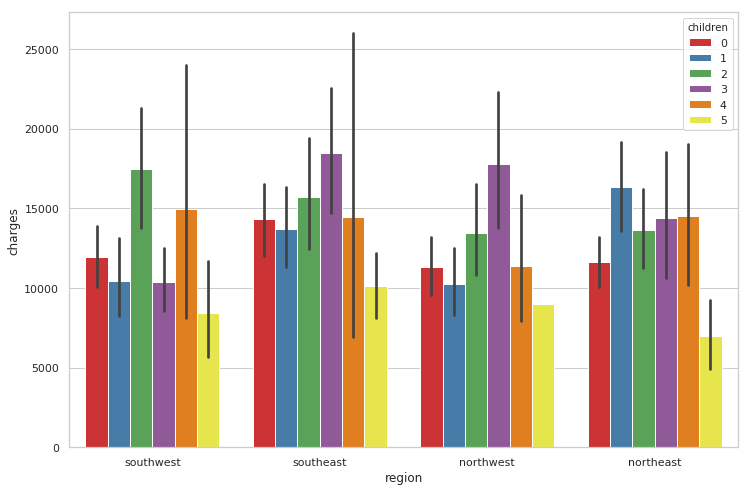

In [35]:
f, ax = plt.subplots(1, 1, figsize=(12,8))
ax = sns.barplot(x='region', y='charges', hue='children', data=data, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still 
in the Southeast but the lowest are in the Northeast. People in the Southwest
generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than 
in the Southwest and Northwest overall. 
And people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


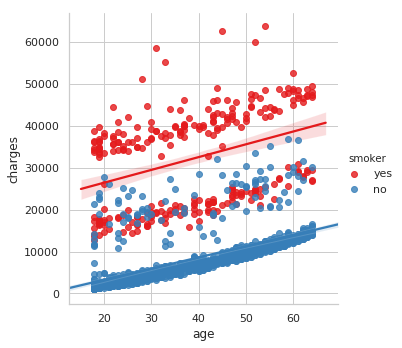

In [44]:
ax = sns.lmplot(x='age', y='charges', hue='smoker', data=data, palette='Set1')
# lmplot----> linear model plot

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


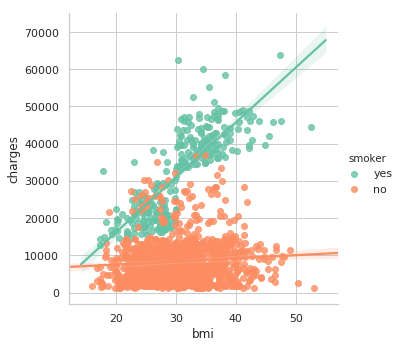

In [45]:
ax = sns.lmplot(x='bmi', y='charges', hue='smoker', data=data, palette='Set2')

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


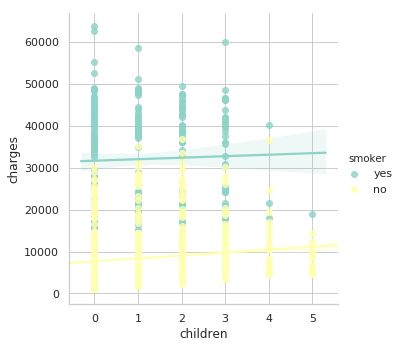

In [46]:
ax = sns.lmplot(x='children', y='charges', hue='smoker', data=data, palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


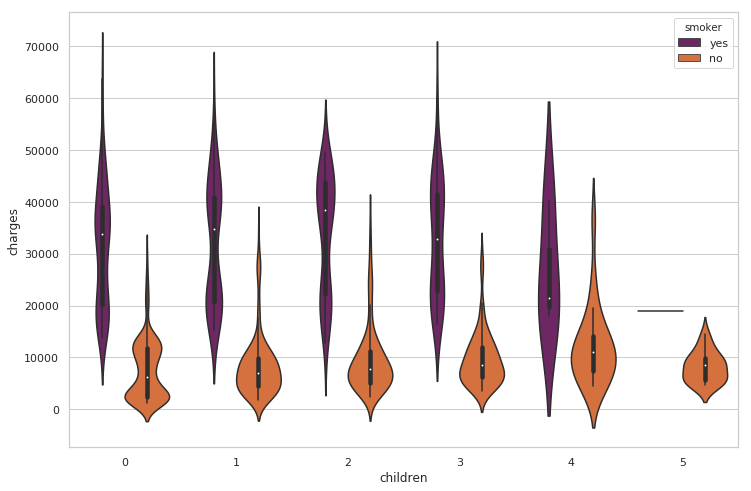

In [47]:
f, ax = plt.subplots(1, 1, figsize=(12,8))
ax = sns.violinplot(x='children', y='charges', hue='smoker', data=data,orient='v', palette='inferno')

In [48]:
#Converting objects labels into categorical
data[['sex','smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('category')

In [49]:
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [50]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

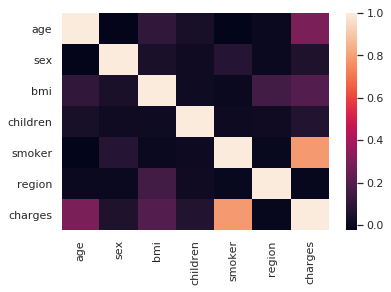

In [51]:
# correlation between the features
corr = data.corr()
sns.heatmap(corr)

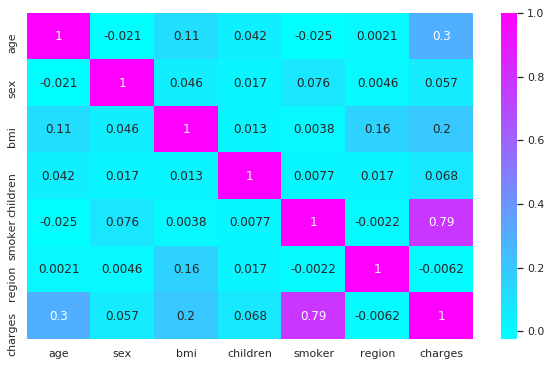

In [61]:
# get all correlation coefficients
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.heatmap(data.corr(), ax=ax, annot=True, cmap='cool')

there is high correlation between smoker and charge// also there is corr between age,bmi with charges-> positive corr

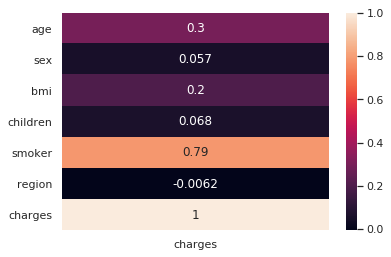

In [59]:
# get corr target featsure
corr = data.corr()[['charges']]
sns.heatmap(corr, annot=True)

# split data: train, test

In [69]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [74]:
X_train ,X_test, Y_train , Y_test = train_test_split(X, y, test_size = 0.3 , random_state =34)

In [84]:
X_train.shape, Y_train.shape

((936, 6), (936,))

In [85]:
X_test.shape, Y_test.shape

((402, 6), (402,))

# Linear Regression 

In [86]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)


model.score(x_test, y_test)

0.8016428995517519

The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

# Ridge Regression

In [88]:
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
Ridge.score(x_test, y_test)

0.7996989632063141

# Lasso Regression

In [91]:
alpha = 0.00099
lasso_reg = Lasso(alpha, max_iter=50000)
lasso_reg.fit(X_train, Y_train)
y_pred = lasso_reg.predict(X_test)
lasso_reg.score(x_test, y_test)

0.8016428820370824

# Random Forest Regressor

In [94]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)
rf_regr.score(x_test, y_test)

0.9386198238339333